<a href="https://colab.research.google.com/github/mgreenho/BiologicallyIntelligentExploration/blob/main/mgreenho_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Background**

The general model of reinforcement learning we have discussed includes modifications for different types of decision making with varying ways of weighing evidence and choices. Specifically, the most sophisticated of these models was the SoftMax (Boltzmann) Actor, which is an alternative to the other sophisticated learning model we reviewed: the epsilon-greedy actor.

In consideration of reducing complexity, here we only will discuss the Q critic, which returns the value of an arm as an average function of previous rewards received.

What is most curious about these models is their straight-forward approach to decision making, using average assumptions about human thought processes to find an average solution that might be applicable to most of the population. However, everything we have discussed has also had drawbacks, has also had exceptions. What if we utilize a singular exception and see where it takes us? Will it lead to a model more applicable to everyone? Or will it follow as expected and specialize in a specific way that only teaches us about a few?

With this, I introduce the common disorder of attention into the forefront of the conversation: ADHD. Attention Deficit/Hyperactivity Disorder is a common disorder that has not yet been fully qualified as to the causes and conditions of its existence. One thing is for certain, and it is that brains diagnosed with ADHD have trouble with many of the topics found in reinforcement learning and decision making. This conclusion is only available through more recent discussion of bottom-up processes' role in ADHD, as opposed to common top-down hypotheses for symptoms of the disorder.

# **Problem**

Based on research of altered drift diffusion models, reinforcement learning models, and reward value and prediction models, I would like to introduce our reinforcement learning model of the Epsilon Greedy Actor to an ADHD-coded environment. This actor is the most associated with disregulation of weighing reward values in making decisions about which arms to travel.

In coding an ADHD environment, I found the deceptive environment to be closest to variability of environments introduced by researchers in testing the abilities of ADHD children to adapt to changing reward probabilities. I then modified the deceptive bandit to acknowledge two elements of ADHD: daily issues prioritizing, thus seeing many more choices available at any time, and secondly, had the reward rates of all except the best arm be variable, indicating changing probability for which choices have dopamine releases and at what time for ADHD individuals.

# **Model**

In [25]:
# Added ADHD Environment Class (Added to local_gym.py in personal explorationlib)

# Made all except a few arms have high reward value to represent low levels of dopamine all around and multiple stimulators that raise that level fairly equally
# Larger number of arms to simulate difficulty narrowing down decisions to a amount easy to prioritize in day to day life

class DeceptiveBanditOneHigh20(DeceptiveBanditEnv):
    """A (0.8, 0.2, 0.2, ...) bandit."""
    def __init__(self):
        self.best = [1,2,3,5,6,7,8,9,10,11,12, 14, 15, 16, 17, 18, 20]
        self.num_arms = 20

        # Set p(R > 0)
        p_dist = [0.2] * self.num_arms
        p_dist[self.best[0]] = 0.8

        # Set baseline R
        r_dist = [1] * self.num_arms

        DeceptiveBanditEnv.__init__(self,
                                    p_dist=p_dist,
                                    r_dist=r_dist,
                                    steps_away=20,
                                    max_steps=500)


NameError: ignored

In [40]:
# Set up cell

!pip install --upgrade git+https://github.com/mgreenho/explorationlib
!pip install --upgrade git+https://github.com/MattChanTK/gym-maze.git

# import basic modules
import shutil
import glob
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# import explorationlib
import explorationlib

# import the type of environment we will be using
from explorationlib.local_gym import DeceptiveBanditOneHigh10
from explorationlib.local_gym import DeceptiveBanditOneHigh20

# import the components to build our agents
from explorationlib.agent import BanditActorCritic
from explorationlib.agent import Critic
from explorationlib.agent import EpsilonActor
from explorationlib.agent import BoundedRandomActor

# import the experimental framework
from explorationlib.run import experiment

# import some scoring functions
from explorationlib.score import total_reward
from explorationlib.score import action_entropy

# import some utility functions
from explorationlib.util import select_exp
from explorationlib.util import load
from explorationlib.util import save

# import some plotting functions
from explorationlib.plot import plot_bandit
from explorationlib.plot import plot_bandit_actions
from explorationlib.plot import plot_bandit_critic
from explorationlib.plot import plot_bandit_hist

# Pretty plots
%matplotlib inline
%config InlineBackend.figure_format='retina'
%config IPCompleter.greedy=True
plt.rcParams["axes.facecolor"] = "white"
plt.rcParams["figure.facecolor"] = "white"
plt.rcParams["font.size"] = "16"

# Dev
%load_ext autoreload
%autoreload 2

  Cloning https://github.com/mgreenho/explorationlib to /tmp/pip-req-build-lsiwms8t
  Running command git clone -q https://github.com/mgreenho/explorationlib /tmp/pip-req-build-lsiwms8t
  Cloning https://github.com/MattChanTK/gym-maze.git to /tmp/pip-req-build-15y2ih_l
  Running command git clone -q https://github.com/MattChanTK/gym-maze.git /tmp/pip-req-build-15y2ih_l


ImportError: ignored

In [38]:
# environment and Actor creation

# Shared env params
seed = 409

# Create control deceptive env
env = DeceptiveBanditOneHigh10()
env.seed(seed)

egreedy10 = BanditActorCritic(
    EpsilonActor(num_actions=env.num_arms, epsilon=0.1),
    Critic(num_inputs=env.num_arms, default_value=0.0)
)

# Create ADHD deceptive env
env = DeceptiveBanditOneHigh20()
env.seed(seed)

egreedy20 = BanditActorCritic(
    EpsilonActor(num_actions=env.num_arms, epsilon=0.1),
    Critic(num_inputs=env.num_arms, default_value=0.0)
)

# organize them
agents = [egreedy10, egreedy20]
names = ["egreedy10", "egreedy20"]
colors = ["blue", "green"]

boundedRand:   0%|          | 0/400 [00:00<?, ?it/s]

egreedy:   0%|          | 0/400 [00:00<?, ?it/s]

total_reward:   0%|          | 0/400 [00:00<?, ?it/s]

total_reward:   0%|          | 0/400 [00:00<?, ?it/s]

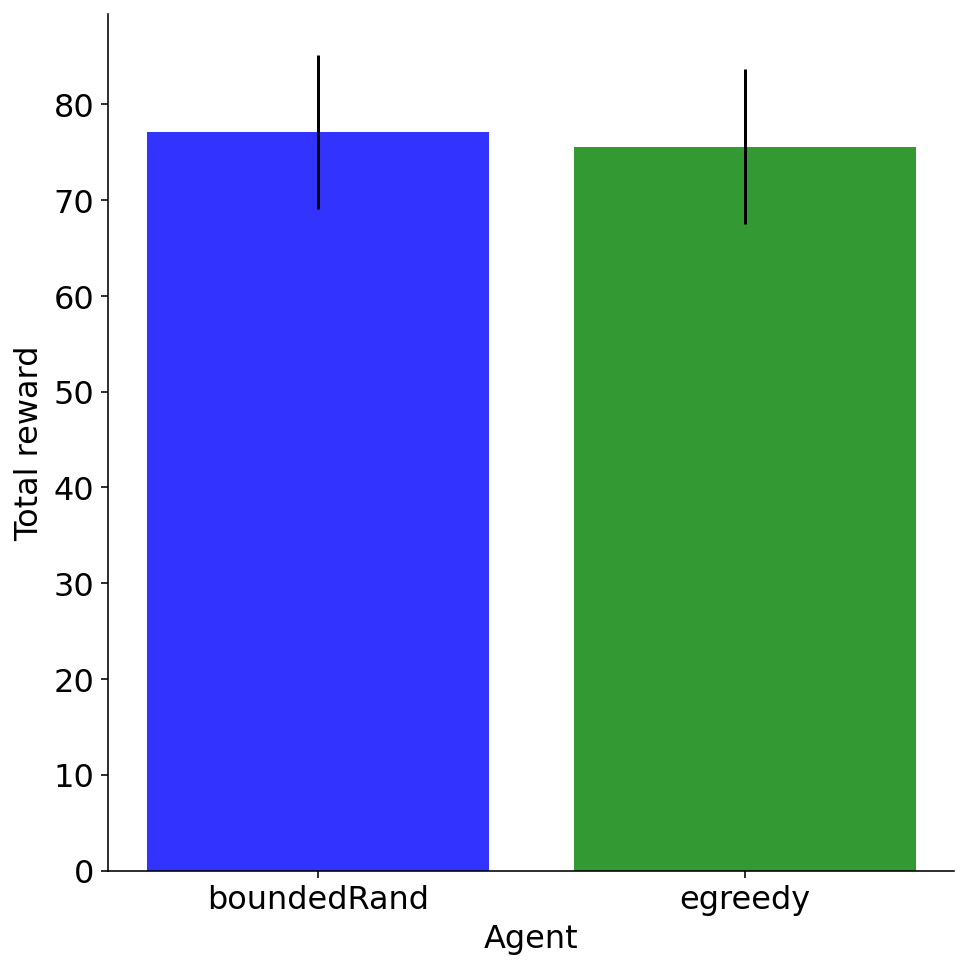

In [39]:
# Run 400 experiments and plot results

num_steps = 400
num_experiments = 400

# !
results = []
for name, agent in zip(names, agents):
    log = experiment(
        f"{name}",
        agent,
        env,
        num_steps=num_steps,
        num_experiments=num_experiments,
        dump=False,
        split_state=False,
    )
    results.append(log)

# Score
scores = []
for name, res, color in zip(names, results, colors):
    r = total_reward(res)
    scores.append(r)   

# Tabulate
m, sd = [], []
for (name, s, c) in zip(names, scores, colors):
    m.append(np.mean(s))
    sd.append(np.std(s))

# Plot means
fig = plt.figure(figsize=(7, 7))
plt.bar(names, m, yerr=sd, color=colors, alpha=0.8)
plt.ylabel("Total reward")
plt.xlabel("Agent")
plt.tight_layout()
sns.despine()

# **Results**

Although I was not able to determine the invisible bug that existed in the import process of the new DeceptiveBandit20 class I created using the existing DeceptiveBanditEnv parent class, I expected to see a much lower reward collection from the ADHD simulated environment due to confusion of which arms to prioritize in exploitation of reward collection.

# **Conclusions and Interpretations**

Based on the changes I made to the DeceptiveBandit environment, I expected to see lower overall scores from the e-greedy actor in the ADHD environment as opposed to the control deceptive environment. Upon discovery of the bug, I would like to further test parameters and possibly the SoftMax actor to see whether it is able to perform better under hostile conditions.

To move forward with this project, I would ideally create a more expansive database of solutions that have been tested and the areas that have already been explored for this question. There are significant areas of questioning in the relationship between ADHD and reinforcement learning as a whole, and a qualitative analysis of the intersections of these different studies would be useful to direct further exploration in this area and in reinforcement learning as a whole.

# **References**

Ziegler, S., Pedersen, M. L., Mowinckel, A. M., & Biele, G. (2016). Modelling ADHD: A review of ADHD theories through their predictions for computational models of decision-making and reinforcement learning. Neuroscience & Biobehavioral Reviews, 71, 633-656.

Silvetti, M., Wiersema, J. R., Sonuga-Barke, E., & Verguts, T. (2013). Deficient reinforcement learning in medial frontal cortex as a model of dopamine-related motivational deficits in ADHD. Neural networks, 46, 199-209.

Alsop, B., Furukawa, E., Sowerby, P., Jensen, S., Moffat, C., & Tripp, G. (2016). Behavioral sensitivity to changing reinforcement contingencies in attention‐deficit hyperactivity disorder. Journal of Child Psychology and Psychiatry, 57(8), 947-956.
Chicago	
